# Potato Disease Classification using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
#IMAGE_SIZE = 256
#BATCH_SIZE = 32
#size_tensor = torch.tensor([new_height, new_width])

In [3]:
data = tf.keras.preprocessing.image_dataset_from_directory(
  "PlantVillage",
   shuffle=True,
   image_size= (256,256),
   batch_size= 32
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = data.class_names

In [5]:
len(data)

68

In [6]:
# 68 comes from batch size *  X (68)= 32* X = 2152 
                                #   X = 2152/32
                                #   x = 68.00
len(data)*32/32

68.0

In [7]:
for image_batch, label_batch in data.take(1):
    print(image_batch.shape)
    print (label_batch.numpy())

(32, 256, 256, 3)
[2 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 2 0 0 1 1 1 1 2 0 0 0 2 1 0 1 0]


In [8]:
# required variables
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [9]:
## tensor to numpy array conversion 
# print(image_batch[0]) = tf
# print(image_batch[0].numby = numpy array

print(image_batch[0].numpy())

[[[178. 166. 176.]
  [178. 166. 176.]
  [179. 167. 177.]
  ...
  [168. 157. 163.]
  [174. 163. 169.]
  [177. 166. 172.]]

 [[170. 158. 168.]
  [170. 158. 168.]
  [171. 159. 169.]
  ...
  [170. 159. 165.]
  [172. 161. 167.]
  [174. 163. 169.]]

 [[171. 159. 169.]
  [171. 159. 169.]
  [172. 160. 170.]
  ...
  [172. 161. 167.]
  [171. 160. 166.]
  [170. 159. 165.]]

 ...

 [[168. 148. 157.]
  [164. 144. 153.]
  [163. 143. 152.]
  ...
  [133. 112. 119.]
  [158. 137. 144.]
  [161. 140. 147.]]

 [[171. 151. 160.]
  [166. 146. 155.]
  [165. 145. 154.]
  ...
  [156. 135. 142.]
  [143. 122. 129.]
  [129. 108. 115.]]

 [[173. 153. 162.]
  [167. 147. 156.]
  [165. 145. 154.]
  ...
  [166. 145. 152.]
  [150. 129. 136.]
  [158. 137. 144.]]]


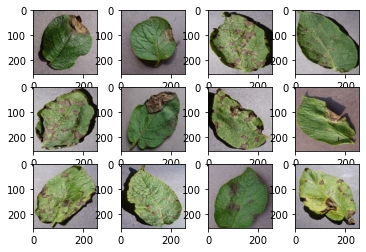

In [10]:
for image_batch, labels_batch in data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

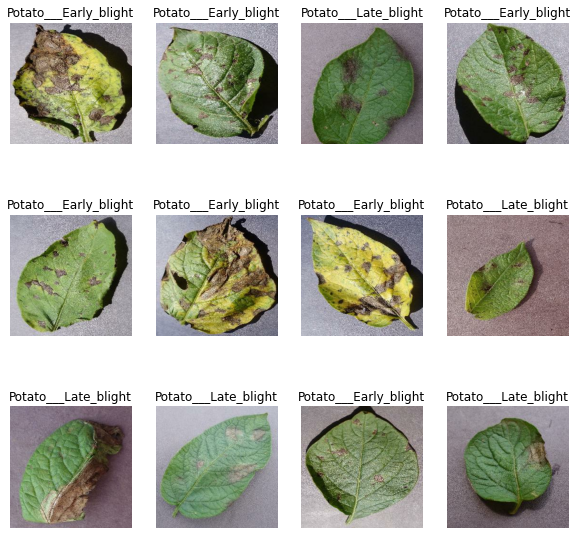

In [11]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [12]:
len(data)

68

In [13]:
train_size = 0.8
len(data)*train_size

54.400000000000006

# Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model

In [14]:
train_ds = data.take(54)
len(train_ds)

54

In [15]:
test_ds = data.skip(54)
len(test_ds)

14

In [16]:
val_size = 0.1
len(data)*val_size

6.800000000000001

In [17]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [18]:
test_ds = test_ds.skip(6)
len(test_ds)

8

# Vary Important Section to Understand
Practice as much as i can

In [35]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    # Use the correct variable name 'train_split' instead of 'trin_split'
    assert (train_split + val_split) <= 1  # Also, fixed the assertion condition
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)  # Corrected the calculation of val_size
    
    # Use 'ds.take(train_size)' to get the training set, and 'ds.skip(train_size).take(val_size)' for validation and test sets
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)  # Corrected the skipping for test set
    
    return train_ds, val_ds, test_ds  # Removed duplicate 'val_ds'

# Example usage:
# train_set, val_set, test_set = get_dataset_partition_tf(dataset, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000)


In [36]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(data)

In [37]:
len(train_ds)

54

In [38]:
len(val_ds)

6

In [39]:
len(test_ds)

8

In [42]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [44]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [47]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])